In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from scipy.io import arff

In [3]:
data, meta = arff.loadarff('five_dataset.arff')
df = pd.DataFrame(data)

# print(df.describe())
print(df.isnull().sum())
print(df.columns.tolist())


Cemment                     0
Slag                        0
Fly_ash                     0
Water                       0
SP                          0
Coarse_Aggr                 0
Fine_Aggr                   0
SLUMP_cm                    0
FLOW_cm                     0
Compressive_Strength_Mpa    0
dtype: int64
['Cemment', 'Slag', 'Fly_ash', 'Water', 'SP', 'Coarse_Aggr', 'Fine_Aggr', 'SLUMP_cm', 'FLOW_cm', 'Compressive_Strength_Mpa']


In [4]:
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.10)
        q2 = df[col].quantile(0.90)
        iqr = q2 - q1
        lower = q1 - 0.1*iqr
        upper = q2 + 0.1*iqr
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers(df, df.columns)

In [5]:
x = df[['Cemment', 'Slag', 'Fly_ash', 'Water', 'SP', 'Coarse_Aggr', 'Fine_Aggr']].values.reshape(-1, 7)
y = df[['SLUMP_cm', 'FLOW_cm', 'Compressive_Strength_Mpa']].values.reshape(-1,3)

xs = MinMaxScaler()
ys = MinMaxScaler()


x = xs.fit_transform(x)
y = ys.fit_transform(y)


jb.dump(xs, 'five_x_scaler.pkl')
jb.dump(ys, 'five_y_scaler.pkl')

['five_y_scaler.pkl']

In [9]:
def prob(x1, x2, x3, x4, x5, x6, x7):
    inp = np.array([[x1, x2, x3, x4, x5, x6, x7]], dtype=float)
    xs = jb.load('five_x_scaler.pkl')
    ys = jb.load('five_y_scaler.pkl')
    model_path = 'five.keras'
    inp = xs.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(7, ), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=3)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
        h = model.fit(x, y, epochs=400)
        lv = h.history['loss']
        pred = model.predict(x)

        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.xlabel('Iterations')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        cols = 3
        rows = (10+1)//2
        plt.figure(figsize = (cols*5, rows*5))
        output_cols = ['DFlow', 'DGap']
        for i in range(2):
            plt.subplot(rows, cols, i+1)
            plt.scatter(y[:, i], pred[:, i], label='actual vs predicted', color='red')
            plt.plot([y[:, i].min(), y[:, i].max()], [y[:, i].min(), y[:, i].max()], 'k--')
            plt.title(output_cols[i])
            plt.xlabel('atual')
            plt.ylabel('predicted')
            plt.grid(True)
            plt.legend()
        
        plt.tight_layout()
        plt.show()
        model.save('five.keras')
    return ys.inverse_transform(model.predict(inp))[0]


Epoch 1/400


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.3343
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1432
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1202
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1220
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0927
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0802
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0740
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0688
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0629
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0563
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0568
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0488
Epoch 13/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0508
Epoch 14/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0447
Epoch 15/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0427
Epoch 16/400
2/2 ━━━━━━━━━━━━━━

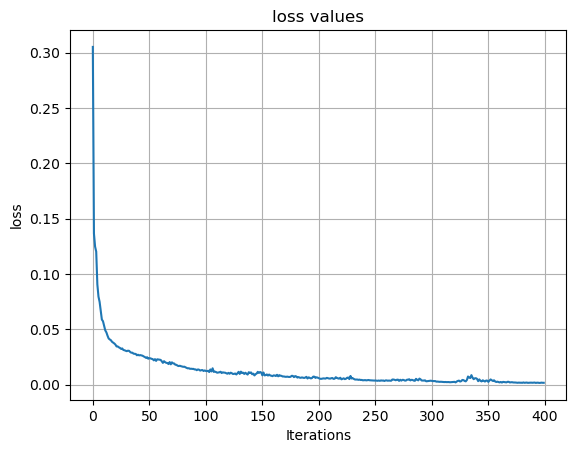

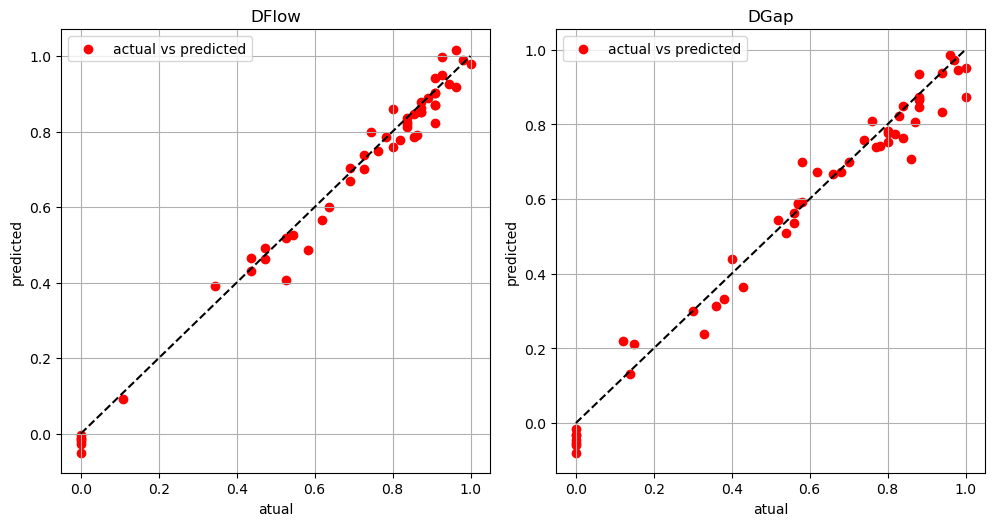

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[20.831322 64.805756 54.42532 ]


In [10]:
print(prob(366,0,187,191,7,824,757))